# Quantum Computing 101: How to use a real Quantum Computer

This notebooks has basically the same content as this [blog post](https://www.jonvet.com/blog/using-a-real-quantum-computer)

In [ ]:
!pip install matplotlib==3.9.0 pylatexenc==2.10 qiskit==1.1.0 qiskit-aer==0.14.1 qiskit-ibm-provider==0.11.0 qiskit-ibm-runtime==0.23.0

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Setting up an IBM Quantum account & API key
This step is easy - just head to https://quantum.ibm.com and sign up for an account. After you log in, you'll see your API key on the top right of the dashboard - copy it.

In [ ]:
# if this is the time you use IBM Quantum
service = QiskitRuntimeService.save_account(channel="ibm_quantum", token="<YOUR_API_KEY>")
# Otherwise run this
# service = QiskitRuntimeService()

# Creating a simple quantum circuit

Let's write a simple quantum circuit that generates a random bit.

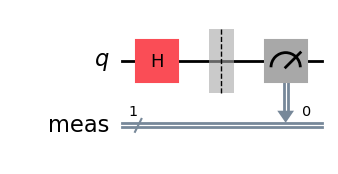

In [7]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

Ok what's going on here? Let's break it down:

- `QuantumCircuit(1)` creates a quantum circuit with 1 qubit.
- `qc.h(0)` applies a Hadamard gate to the qubit - putting it in a [superposition](https://www.jonvet.com/blog/what-is-quantum-superposition) of 0 and 1.
- `qc.measure_all()` measures the qubit, collapsing it to a classical bit.
- `qc.draw('mpl')` draws the circuit using matplotlib.

At this point we have the choice to run this circuit on a simulator or on a real quantum computer. The simulator can be interesting for debugging and testing, and you can also get the theoretical results for comparison.

We'll take a look at the simulator later, let's run this on a real quantum computer first.

If you know what a [superposition](https://www.jonvet.com/blog/what-is-quantum-superposition) is, you'll know what to expect - a 50% chance of getting 0 and a 50% chance of getting 1. Let's verify that this is indeed what happens.

Run the following to grab the quantum computer that is least busy at the moment. There are still not too many machines available so if you submit a job you typically end up in a queue.

In [8]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=1)
print(backend.name)

ibm_kyoto


Next, we have to transpile our quantum circuit given the backend we just picked.

In [9]:
qc_transpiled = transpile(qc, backend, optimization_level=2)

The reason we have to do this is that every backend potentially has a different layout. For example some qubits might be connected or not and depending on what gates your quantum circuit uses (especially when it comes to 2-qubit gates) this will be important. Transpilation also does some optimizations in order to reduce the number of gates used. It's not really important for a simple circuit like this but can really matter for more complex circuits.

Finally, we can run the circuit on the quantum computer. Run the following code to submit your job to the quantum computer and run it 1000 times. The reason why we run it not just once is that we want to confirm that we get the expected probabilities. Running the circuit once just gives us one measurement, 0 or 1.

In [16]:
sampler = Sampler(backend=backend)
qc_job = sampler.run([qc_transpiled], shots=1000)

This should take a few seconds to run depending on how busy the quantum computers are at the moment. Once it's done, you can get the results by running:

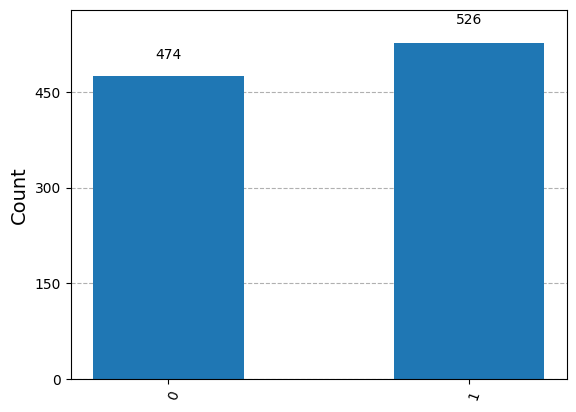

In [17]:
plot_histogram(qc_job.result()[0].data.meas.get_counts())

🥳🥳🥳 Congrats, you just ran your first quantum circuit on a real quantum computer! 🥳🥳🥳

# Running a slightly more complex quantum circuit

Where do we go from here? Let's try something a little bit more complex. Let's create a quantum circuit with 2 qubits, and let's also entangle them. After this you'll be able to say that you put qubits into [superposition](https://www.jonvet.com/blog/what-is-quantum-superposition) and [entanglement](https://www.jonvet.com/blog/what-is-quantum-entanglement) and ran all of that on a real quantum computer - how cool is that?

## Preparing a Bell State

Specifically we're going to create a Bell state. Creating a Bell state is one of simplest ways of creating an entangled qubit pair.

To achieve this run the following:

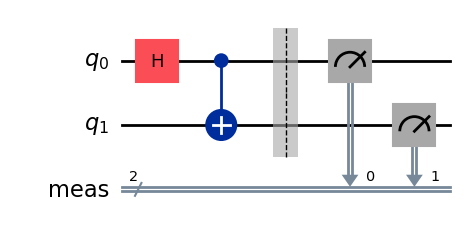

In [18]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
bell.draw('mpl')

What we did here:

- create a quantum circuit with 2 qubits
- apply a Hadamard gate to the first qubit, putting it in superposition as before
- apply a CNOT (controlled-NOT) gate to the second qubit, controlled by the first qubit
- measure both qubits
- draw the circuit

We just introduced a new 2-qubit gate, the CNOT gate, and it's worth briefly talking about what it does. A CNOT has a control qubit and a target qubit. The effect of this gate is as follows:

- If the control qubit is in state 1, the target qubit is flipped.
- If the control qubit is in state 0, the target qubit is left alone.

Now let's think about for a second what the expected results are. In a general 2-qubit system, there are 4 possible states: `00`,`01`, `10`, and `11`.

As before, given the first qubit is in superposition, we expect to see a 50/50 split between the `0` and the `1` state when measuring this first qubit. And since we have the CNOT gate, the second qubit should always be in the same state as the first qubit.

So in our Bell state at hand, only 2 of these states are possible: `00` and `11` and we expect to see a 50/50 split between these two states. This highlights one of the features of quantum entanglement: the qubits are put into a joint state such that measuring one qubit will immediately also determine the state of the other qubit.

In practice, as we are dealing with noisy quantum computers, we might see some deviations from these ideal results, and observe measure `01` or `10` sometimes.

Let's try it out!

You're probably getting the hang of this by now. Just make sure you request a quantum computer with at least 2 qubits.

In [19]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)
bell_transpiled = transpile(bell, backend, optimization_level=2)

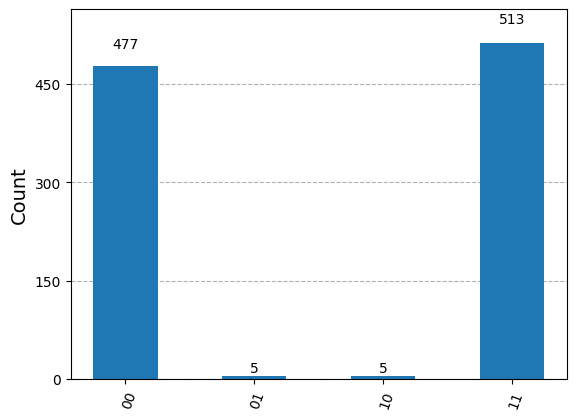

In [20]:
sampler = Sampler(backend=backend)
bell_job = sampler.run([bell_transpiled], shots=1000)
plot_histogram(bell_job.result()[0].data.meas.get_counts())

# Recap
Congrats if you made it all the way here. You can be proud of yourself - you just ran a quantum circuit on a real quantum computer! What we covered in this post:

- Setting up your environment to run quantum circuits on IBM Quantum's cloud machines
- Writing a simple quantum circuit that generates a random bit
- Running this circuit on a real quantum computer and verifying the results
- Writing a slightly more complex quantum circuit that creates a Bell state
- Running this circuit on a real quantum computer and verifying the results

In other words, you just put qubits into [superposition](https://www.jonvet.com/blog/what-is-quantum-superposition) and [entanglement](https://www.jonvet.com/blog/what-is-quantum-entanglement) and ran all of that on a real quantum computer. Not bad for a day's work!